# Assignment 6

In [1]:
import pandas as pd
# import dataset
heart_data = pd.read_csv('./heart_dataset.csv')

heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Data Preprocessing

In [2]:
heart_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [3]:
print(heart_data.shape)

(918, 12)


In [4]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
# Split the data into features and target
Xdf = heart_data.drop('HeartDisease', axis=1)
ydf = heart_data['HeartDisease']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Specify columns to one-hot encode
one_hot_encode_columns = ['Sex', 'ChestPainType', 'ExerciseAngina', 'RestingECG', 'ST_Slope']

# Build a preprocessor that one-hot encodes the specified columns
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), one_hot_encode_columns)
    ],
    remainder='passthrough'
)

# transform the data
X_transformed = preprocessor.fit_transform(Xdf)

X_transformed.shape


(918, 20)

Report 10-fold cross-validation (“CV”) performances of the following types of
classifiers, using default parameters:
- GaussianNB
- Linear SVC (use SVC(kernel='linear', probability=True))
- MLPClassifier
- DecisionTreeClassifier

Now report the RandomForestClassifier performance too.

In [ ]:
# 10 fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import numpy as np

# Define the classifiers
classifiers = [
    GaussianNB(),
    SVC(kernel='linear', probability=True),
    MLPClassifier(),
    DecisionTreeClassifier(),
]

# 10-fold CV evaluation of a classifier
def eval_classifier(_clf, _X, _y):
    accuracies = []
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(_X, _y):
        _clf.fit(_X[train_index], _y[train_index])
        y_pred = _clf.predict(_X[test_index])
        accuracies += [accuracy_score(_y[test_index], y_pred)]
    return np.array(accuracies)


for classifier in classifiers:
    scores = eval_classifier(classifier, X_transformed, ydf)
    print(f"{classifier.__class__.__name__} - Accuracy: {scores.mean():.4f} ({chr(177)} {scores.std() * 2:.4f})")

# RandomForestClassifier performance
X_train, X_test, y_train, y_test = train_test_split(X_transformed, ydf, test_size=0.2, random_state=42)
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"RandomForestClassifier - Accuracy: {accuracy:.4f}")



GaussianNB - Accuracy: 0.8583 (± 0.0675)
SVC - Accuracy: 0.8627 (± 0.0587)
MLPClassifier - Accuracy: 0.8540 (± 0.0742)
DecisionTreeClassifier - Accuracy: 0.7952 (± 0.0831)
RandomForestClassifier - Accuracy: 0.8913


### Ensemble Generation and Evaluation of Weak Classifiers

- For each of the four basic classifiers from Q1 (GaussianNB, SVC, MLPClassifier, DecisionTreeClassifier), we generate an ensemble of 100 classifiers.
- Each ensemble is stored as a list.
- To create "weak" sub-classifiers:
    - **Neural Network (MLPClassifier):** hidden_layer_sizes=(3, 3), max_iter=30, tol=1e-1
    - **Decision Tree:** max_depth=5, max_features=5
- For each ensemble, we report the performance (accuracy) of the **first** classifier in the ensemble using 10-fold cross-validation.

In [8]:
# Create a list of 100 weak classifier for each of the four basic classifiers
# hide warnings
import warnings
warnings.filterwarnings('ignore')

# GaussianNB 
gaussian_nb_ensemble = [GaussianNB() for _ in range(100)]

# Linear SVC
linear_svc_ensemble = [SVC(kernel='linear', probability=True) for _ in range(100)]

# MLPClassifier
mlp_classifier_ensemble = [MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=30, tol=1e-1) for _ in range(100)]

# DecisionTreeClassifier
decision_tree_ensemble = [DecisionTreeClassifier(max_depth=5, max_features=5) for _ in range(100)]

# Report the performance of the first classifier in the ensemble 
def report_performance(ensemble, name):
    scores = cross_val_score(ensemble, X_transformed, ydf, cv=10)
    print(f"{name} - Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")


In [9]:
report_performance(gaussian_nb_ensemble[0], "GaussianNB")

GaussianNB - Accuracy: 0.8518 (+/- 0.1030)


In [10]:
report_performance(linear_svc_ensemble[0], "Linear SVC")

Linear SVC - Accuracy: 0.8462 (+/- 0.1188)


In [11]:
report_performance(mlp_classifier_ensemble[0], "MLPClassifier")

MLPClassifier - Accuracy: 0.4892 (+/- 0.1665)


In [12]:
report_performance(decision_tree_ensemble[0], "DecisionTreeClassifier")

DecisionTreeClassifier - Accuracy: 0.8212 (+/- 0.1182)


Write a function `ensemble_fit()` to receive the ensemble (i.e. one of the 4 lists from Q2.) as an input and train it on one of the subsets (i.e. bagging) of the training data. (Hint: `random.sample` could generate the subset of data you’ll need.) This way, each classifier will see only a different subset of the training dataset, also called as subsampling the input data for training. Use all features in these subsamples; only subsample the rows/observations.

In [13]:
def ensemble_fit(ensemble, X_train, y_train, subsample_ratio=0.7):
    from sklearn.model_selection import StratifiedShuffleSplit
    import numpy as np

    if not (0 < subsample_ratio <= 1):
        raise ValueError("subsample_ratio must be in (0, 1].")

    y_array = np.array(y_train)
    fitted_ensembles = []

    # Train each classifier in the ensemble on a different subset
    for classifier in ensemble:
        # use stratified shuffle split to guarentee class proportions are preserved
        # I was running into errors using random.sample
        sss = StratifiedShuffleSplit(n_splits=1, train_size=subsample_ratio, random_state=None)
        train_idx, _ = next(sss.split(X_train, y_array))

        X_subset = X_train[train_idx]
        y_subset = y_array[train_idx]

        classifier.fit(X_subset, y_subset)
        fitted_ensembles.append(classifier)

    return fitted_ensembles

Write a function `ensemble_predict()` to receive the trained ensemble (i.e. one of the lists from Q3.) as input and output a prediction for a given observation.

Since each sub-classifier will have its own prediction, use a voting scheme on the returned predictions.

(Hint: The final prediction should be the `np.argmax()` of the votes, not merely a “max”. Note that `c.predict_proba()` should have better results.)


In [ ]:
def ensemble_predict(ensemble, X_test):
    # Collect probability predictions from all classifiers
    all_probas = []
    for classifier in ensemble:
        probas = classifier.predict_proba(X_test)
        all_probas.append(probas)
    
    # Sum up probabilities across classifiers 
    summed_probas = np.sum(all_probas, axis=0)
    
    # Get class with highest total probability for each observation
    predictions = np.argmax(summed_probas, axis=1)
    
    return predictions   

In [15]:
# test the ensemble_predict function for sanity
gaussian_nb_fitted_ensemble = ensemble_fit(gaussian_nb_ensemble, X_train, y_train)
ensemble_predict(gaussian_nb_fitted_ensemble, X_test)

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1])

Report 10-fold CV performances of the ensembles with a subsample ratio of 0.2.
Compare to a regular decision tree (same subsample ratio).
Now repeat these for a subsample ratio of 0.05.

In [16]:
# cross validation for the ensembles
def cross_val_performance(ensemble, X, y, subsample_ratio=0.2, n_splits=10):
    from sklearn.base import clone
    from sklearn.metrics import accuracy_score
    
    accuracies = []
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
    
    for train_index, test_index in kf.split(X, y):
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
        
        ensemble_fold = [clone(clf) for clf in ensemble]
        
        fitted_ensemble = ensemble_fit(ensemble_fold, X_train_fold, y_train_fold, subsample_ratio)
        
        # Predict on the test data
        y_pred = ensemble_predict(fitted_ensemble, X_test_fold)
        
        # Calculate accuracy
        acc = accuracy_score(y_test_fold, y_pred)
        accuracies.append(acc)
        
    return np.array(accuracies)

In [17]:
print("="*80)
print("10-FOLD CV PERFORMANCE WITH SUBSAMPLE RATIO = 0.2")
print("="*80)

# Test each ensemble with subsample ratio 0.2
ensembles = {
    'GaussianNB': gaussian_nb_ensemble,
    'Linear SVC': linear_svc_ensemble,
    'MLPClassifier': mlp_classifier_ensemble,
    'DecisionTree': decision_tree_ensemble
}

for name, ensemble in ensembles.items():
    scores = cross_val_performance(ensemble, X_transformed, ydf, subsample_ratio=0.2)
    print(f"{name} Ensemble (subsample=0.2) - Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")


10-FOLD CV PERFORMANCE WITH SUBSAMPLE RATIO = 0.2
GaussianNB Ensemble (subsample=0.2) - Accuracy: 0.8605 (+/- 0.0715)
Linear SVC Ensemble (subsample=0.2) - Accuracy: 0.8671 (+/- 0.0578)
MLPClassifier Ensemble (subsample=0.2) - Accuracy: 0.5545 (+/- 0.1192)
DecisionTree Ensemble (subsample=0.2) - Accuracy: 0.8661 (+/- 0.0796)


In [18]:
# Compare to a regular decision tree with subsample ratio 0.2
single_dt_ensemble = [DecisionTreeClassifier(max_depth=5, max_features=5)]
scores_dt = cross_val_performance(single_dt_ensemble, X_transformed, ydf, subsample_ratio=0.2)
print(f"\nSingle Decision Tree (subsample=0.2) - Accuracy: {scores_dt.mean():.4f} ({chr(177)} {scores_dt.std() * 2:.4f})")
print("\n" + "="*80)



Single Decision Tree (subsample=0.2) - Accuracy: 0.8061 (± 0.0786)



In [19]:
print("="*80)
print("10-FOLD CV PERFORMANCE WITH SUBSAMPLE RATIO = 0.05")
print("="*80)

# Test each ensemble with subsample ratio 0.05
for name, ensemble in ensembles.items():
    scores = cross_val_performance(ensemble, X_transformed, ydf, subsample_ratio=0.05)
    print(f"{name} Ensemble (subsample=0.05) - Accuracy: {scores.mean():.4f} ({chr(177)} {scores.std() * 2:.4f})")


10-FOLD CV PERFORMANCE WITH SUBSAMPLE RATIO = 0.05
GaussianNB Ensemble (subsample=0.05) - Accuracy: 0.8572 (± 0.0739)
Linear SVC Ensemble (subsample=0.05) - Accuracy: 0.8628 (± 0.0626)
MLPClassifier Ensemble (subsample=0.05) - Accuracy: 0.5513 (± 0.1283)
DecisionTree Ensemble (subsample=0.05) - Accuracy: 0.8639 (± 0.0812)


In [20]:
# Compare to a regular decision tree with subsample ratio 0.05
scores_dt_005 = cross_val_performance(single_dt_ensemble, X_transformed, ydf, subsample_ratio=0.05)
print(f"\nSingle Decision Tree (subsample=0.05) - Accuracy: {scores_dt_005.mean():.4f} ({chr(177)} {scores_dt_005.std() * 2:.4f})")
print("\n" + "="*80)



Single Decision Tree (subsample=0.05) - Accuracy: 0.7265 (± 0.1731)



## Questions 6 and 7

6. [10 pts] Report the 10-fold CV performances of the ensembles for the training subsample ratios of (0.005, 0.01, 0.03, 0.05, 0.1, 0.2). Now train regular versions of those 4 classifiers and report their performance. (Hint: pass the regular classifier to the same ensemble CV in a list of one element. This way, the same script can be used for this entire step)

7. [10 pts] For each of the 4 types of classifier, plot the performances of the ensemble at the different subsample ratios and the performances of the regular classifier at the different subsample ratios on the same plot. Thus, you should have 4 plots, one for each type of classifier. To make it graphically clear which performances are ensemble vs. regular, plotting in 2 different colors is recommended.

Report your detailed observations.


In [21]:
import numpy as np
import matplotlib.pyplot as plt

subsample_ratios = [0.005, 0.01, 0.03, 0.05, 0.1, 0.2]

single_classifiers = {
    'GaussianNB': [GaussianNB()],
    'Linear SVC': [SVC(kernel='linear', probability=True)],
    'MLPClassifier': [MLPClassifier()],
    'DecisionTree': [DecisionTreeClassifier()]
}


results = {}
ordered_names = ['GaussianNB', 'Linear SVC', 'MLPClassifier', 'DecisionTree']

for name in ordered_names:
    print("\n")

    print("="*80)
    print(f"Classifier: {name}")
    print("="*80)
    ensemble_means, ensemble_errs = [], []
    single_means, single_errs = [], []
    for ratio in subsample_ratios:
        score_ensemble = cross_val_performance(ensembles[name], X_transformed, ydf, subsample_ratio=ratio)
        ensemble_means.append(np.mean(score_ensemble))
        ensemble_errs.append(np.std(score_ensemble))

        # Single Classifiers
        scores_single = cross_val_performance(single_classifiers[name], X_transformed, ydf, subsample_ratio=ratio)
        single_means.append(np.mean(scores_single))
        single_errs.append(np.std(scores_single))

        print(f"Ensemble (subsample={ratio}) - Accuracy: {np.mean(score_ensemble):.4f} ({chr(177)} {np.std(score_ensemble) * 2:.4f})")
        print(f"Regular (subsample={ratio}) - Accuracy: {np.mean(scores_single):.4f} ({chr(177)} {np.std(scores_single) * 2:.4f})")

    results[name] = {
        'ensemble_accuracy': np.array(ensemble_means),
        'ensemble_error': np.array(ensemble_errs),
        'single_accuracy': np.array(single_means),
        'single_error': np.array(single_errs),
    }



Classifier: GaussianNB
Ensemble (subsample=0.005) - Accuracy: 0.8540 (± 0.0666)
Regular (subsample=0.005) - Accuracy: 0.7002 (± 0.2309)
Ensemble (subsample=0.01) - Accuracy: 0.8530 (± 0.0668)
Regular (subsample=0.01) - Accuracy: 0.7942 (± 0.1132)
Ensemble (subsample=0.03) - Accuracy: 0.8561 (± 0.0684)
Regular (subsample=0.03) - Accuracy: 0.7658 (± 0.1424)
Ensemble (subsample=0.05) - Accuracy: 0.8507 (± 0.0678)
Regular (subsample=0.05) - Accuracy: 0.8028 (± 0.0494)
Ensemble (subsample=0.1) - Accuracy: 0.8562 (± 0.0681)
Regular (subsample=0.1) - Accuracy: 0.8365 (± 0.0758)
Ensemble (subsample=0.2) - Accuracy: 0.8573 (± 0.0705)
Regular (subsample=0.2) - Accuracy: 0.8508 (± 0.0664)


Classifier: Linear SVC
Ensemble (subsample=0.005) - Accuracy: 0.4662 (± 0.0643)
Regular (subsample=0.005) - Accuracy: 0.5052 (± 0.2093)
Ensemble (subsample=0.01) - Accuracy: 0.6394 (± 0.1171)
Regular (subsample=0.01) - Accuracy: 0.4978 (± 0.2868)
Ensemble (subsample=0.03) - Accuracy: 0.8465 (± 0.0661)
Regula

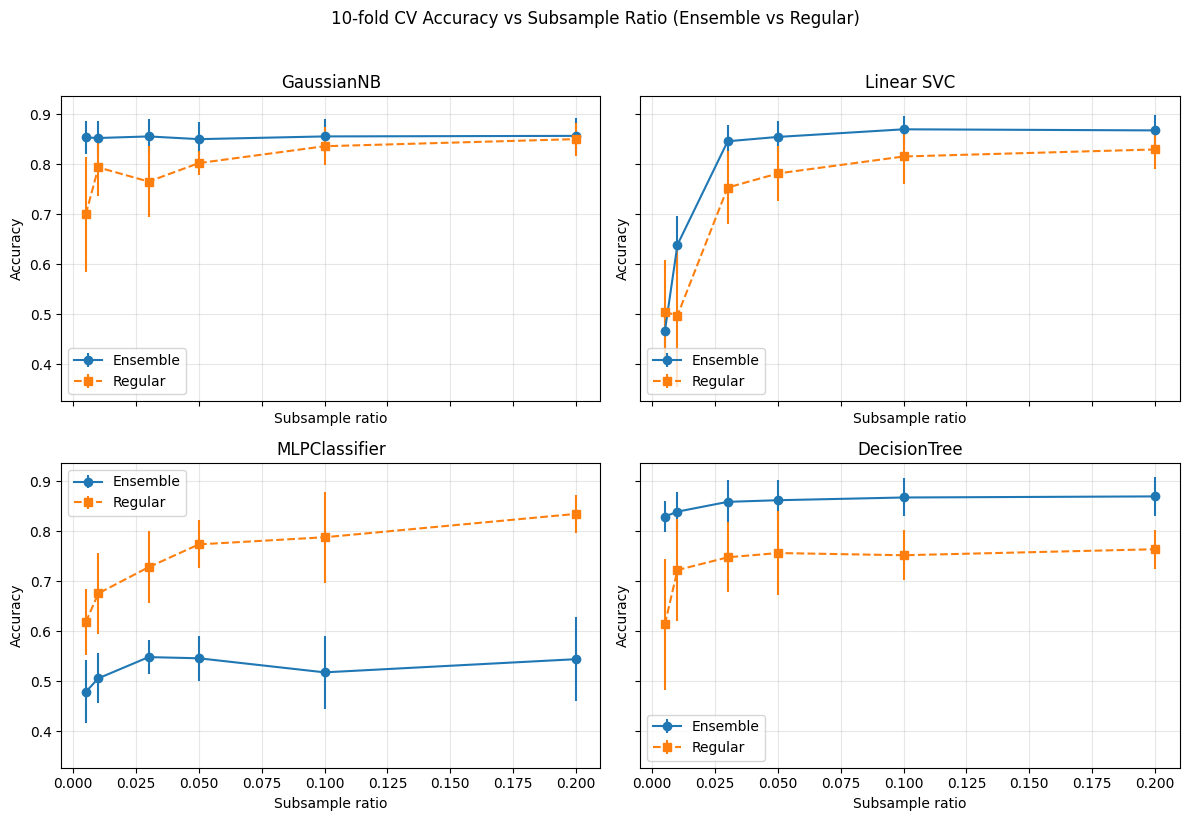

In [22]:
# Plot results

fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
for ax, name in zip(axes.flat, ordered_names):
    r = results[name]
    ax.errorbar(subsample_ratios, r['ensemble_accuracy'], yerr=r['ensemble_error'], label='Ensemble', marker='o', color='C0', linestyle='-')
    ax.errorbar(subsample_ratios, r['single_accuracy'], yerr=r['single_error'], label='Regular', marker='s', color='C1', linestyle='--')
    ax.set_title(name)
    ax.set_xlabel('Subsample ratio')
    ax.set_ylabel('Accuracy')
    ax.grid(True, alpha=0.3)
    ax.legend()
fig.suptitle('10-fold CV Accuracy vs Subsample Ratio (Ensemble vs Regular)', y=1.02, fontsize=12)
plt.tight_layout()
plt.show()


Across models, ensembling helps when it reduces variance without adding bias. GaussianNB’s ensemble is very stable at roughly 0.85–0.86 across all subsample ratios, whereas the single model is far less reliable on tiny subsets (≈0.70 at 0.005) and gradually approaches the ensemble as more data is available (≈0.85 at 0.2). Decision trees are a classic example of bagging. The ensemble is strong and remarkably steady (≈0.83–0.87) with smaller error bars, clearly outperforming a single tree at every ratio (the single ranges ≈0.61–0.76). These gains are consistent with high‑variance base learners benefiting from averaging many models trained on different row subsamples.

Two interesting contrasts are Linear SVC and MLP. With the updated results, the Linear SVC ensemble improves rapidly with more data per base learner and surpasses the regular SVC at every practical ratio (ensemble ≈0.85–0.87 for ratios ≥0.03 vs single ≈0.75–0.83), indicating effective variance reduction and stabilization from probability averaging once each base SVC is sufficiently trained. By contrast, the intentionally underpowered MLP remains bias‑limited. The single model climbs with more data (up to ≈0.83 at 0.2), but the ensemble lingers around 0.54–0.55 across ratios. Averaging many weak, underfit networks cannot recover lost signal. Overall, bagging helps most for high‑variance learners or when probability averaging stabilizes small‑sample estimates, but it is not a remedy for underfitting.